In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.8MB/s]
100% 1.06G/1.06G [00:47<00:00, 23.9MB/s]


In [ ]:
import zipfile
zip_file=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_file.extractall()
zip_file.close()

In [ ]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
!nvidia-smi

Mon Jan  9 12:52:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |    438MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
conv_base.trainable=True
set_trainable=False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model=Sequential([
    conv_base,
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(150,150)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tensorflow.cast(image/255,tensorflow.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
1250/1250 [==============================] - 96s 68ms/step - loss: 0.2171 - accuracy: 0.9105 - val_loss: 0.1742 - val_accuracy: 0.9236
Epoch 2/10
1250/1250 [==============================] - 93s 75ms/step - loss: 0.1182 - accuracy: 0.9532 - val_loss: 0.1286 - val_accuracy: 0.9494
Epoch 3/10
1250/1250 [==============================] - 87s 69ms/step - loss: 0.0773 - accuracy: 0.9711 - val_loss: 0.1184 - val_accuracy: 0.9538
Epoch 4/10
1250/1250 [==============================] - 86s 69ms/step - loss: 0.0484 - accuracy: 0.9836 - val_loss: 0.1298 - val_accuracy: 0.9524
Epoch 5/10
1250/1250 [==============================] - 95s 76ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.1348 - val_accuracy: 0.9538
Epoch 6/10
1250/1250 [==============================] - 87s 69ms/step - loss: 0.0160 - accuracy: 0.9959 - val_loss: 0.1548 - val_accuracy: 0.9558
Epoch 7/10
1250/1250 [==============================] - 87s 70ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.2096 -

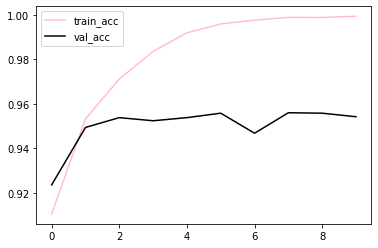

In [ ]:
#plotting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='pink',label='train_acc')
plt.plot(history.history['val_accuracy'],color='black',label='val_acc')
plt.legend()
plt.show()

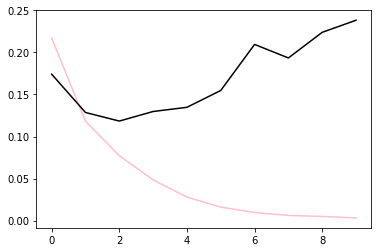

In [ ]:
plt.plot(history.history['loss'],color='pink',label='train_loss')
plt.plot(history.history['val_loss'],color='black',label='val_loss')

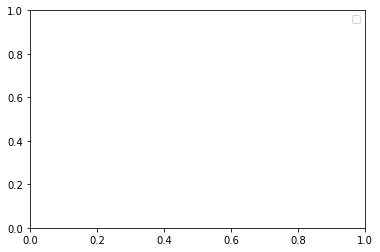

In [ ]:
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/DataSet_for_Wrangling/Dog-vs-Cat/model.h5')

In [ ]:
import cv2
def model_prediction(path):
  img=cv2.imread(path)
  img=cv2.resize(img,(150,150))
  img=img.reshape((1,150,150,3))
  result=model.predict(img)
  return result


In [ ]:
print(model_prediction('/content/download.jpg')[0][0])

1/1 [==============================] - 0s 25ms/step
0.0


In [ ]:
from keras.models import load_model
from keras.utils import load_img
dic={0:'Cat',1:'Dog'}

def try_2(path):
  i=image.load_img(path,target_size=(150,150))
  i=image.to_array(i)/255.0
  i=i.reshape(1,150,150,3)
  p=model.predict_classes(i)
  return dic[p[0]]

ImportError: ignored

AttributeError: ignored

In [ ]:
from keras.utils import load_img